# DBSCAN Clustering


In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('datasets/fies_df_for_ML.csv')

In [2]:
# Pick out Key Columns for Income and Expenditure
summary_columns = [
    'total_salaries_wages',
    'net_crop_fruit_share',
    'cash_receipts_abroad',
    'cash_receipts_domestic',
    'pension_retirement_benefits',
    'dividends_from_investment',
    'other_income_nec',
    'family_sustenance_activities',
    'total_gifts_received',
    'total_income_entrepreneurial_activities',
    'imputed_housing_benefit_rental_value',
    'household_food_expenditure',
    'total_non_food_expenditure',
]

In [3]:
# Drop all ID columns and scale the data
X = dataset[summary_columns]

X.shape

(163268, 13)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Configure DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define the grid of hyperparameters
eps_values = [0.1, 0.2, 0.3, 0.5]  # Smaller steps
min_samples_values = [10, 15, 20, 30]  # Wider range


# Variables to store the best model and score
best_score = -1
best_dbscan = None
best_eps = None
best_min_samples = None

# Iterate through all combinations of hyperparameters
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Testing eps={eps}, min_samples={min_samples}")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit the model and predict labels
        labels = dbscan.fit_predict(X_scaled)  
        print(f'Unique labels: {np.unique(labels)}')
        
        # Ignore noise points (-1) when calculating silhouette score
        if len(set(labels)) > 1:
            unique_labels = set(labels)
            if -1 in unique_labels:
                unique_labels.remove(-1)
            if len(unique_labels) > 1:
                score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
                print(f"Silhouette Score (excluding noise): {score}")

            
            # Update best model if the score improves
            if score > best_score:
                best_score = score
                best_dbscan = dbscan
                best_eps = eps
                best_min_samples = min_samples

Testing eps=0.1, min_samples=10
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58]
Silhouette Score (excluding noise): -0.4262554931203697
Testing eps=0.1, min_samples=15
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Silhouette Score (excluding noise): -0.32405523640442124
Testing eps=0.1, min_samples=20
Unique labels: [-1  0  1  2  3  4  5]
Silhouette Score (excluding noise): -0.10346251414294332
Testing eps=0.1, min_samples=30
Unique labels: [-1  0  1  2  3]
Silhouette Score (excluding noise): 0.433426747094012
Testing eps=0.2, min_samples=10
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Silhouette Score (excluding noise): -0.4692526140989126
Testing eps=0.2, min_samples=15
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 1

DBSCAN(min_samples=20)

In [ ]:
# Output the best parameters and model
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

# Fit the best model
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X_scaled)

In [6]:
labels = dbscan.labels_
unique_labels = np.unique(labels)
print(f"Unique labels: {unique_labels}")

Unique labels: [-1  0  1]


/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_71741/2555697550.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {label}", s=20)


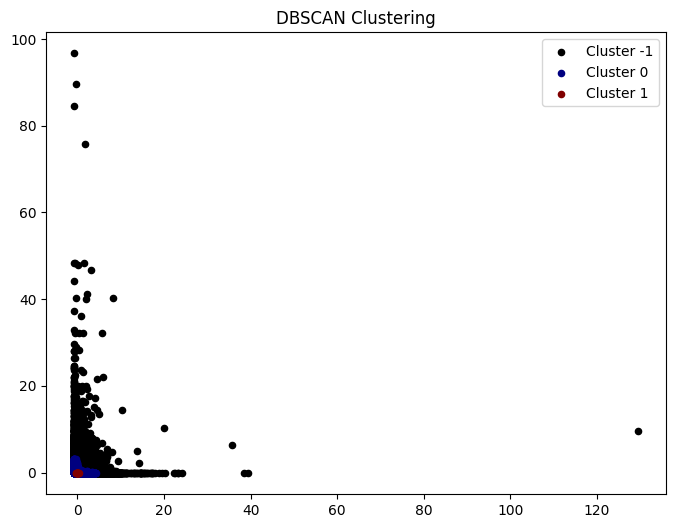

In [9]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    # Points in this cluster
    cluster_points = X_scaled[labels == label]
    
    # Assign a color; noise points (-1) are black
    color = 'k' if label == -1 else plt.cm.jet(float(label) / max(unique_labels))
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {label}", s=20)

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()
